In [1]:
import pandas as pd

In [2]:
train_dataframe = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.train.csv")

In [3]:
train_dataframe

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1,No,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Yes,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95
5630,No,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3
5631,No,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5632,Yes,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [4]:
# Mostra quante classi ci sono per ciascuna features e quanti valori nulli
pd.concat([train_dataframe.nunique(), train_dataframe.isnull().sum()], axis=1).rename({0: 'nunique', 1: 'nancount'}, axis=1)

,nunique,nancount
Churn,2,0
customerID,5634,0
gender,2,0
SeniorCitizen,2,0
Partner,2,0
Dependents,2,0
tenure,73,0
PhoneService,2,0
MultipleLines,3,0
InternetService,3,0


In [5]:
# Per ogni colonna mostra quante e quali classi ci sono ed il tipo di dato
print('Numero di righe totali: ', train_dataframe.shape[0], '\n')
for col in train_dataframe.columns:
    print('Colonna: {}, classi totali: {}, tipo di dato: {}'.format(col, 
                                                                    len(train_dataframe[col].unique()), 
                                                                    train_dataframe[col].dtype))
    print(train_dataframe[col].unique(), '\n')

Numero di righe totali:  5634 

Colonna: Churn, classi totali: 2, tipo di dato: object
['No' 'Yes'] 

Colonna: customerID, classi totali: 5634, tipo di dato: object
['4223-BKEOR' '6035-RIIOM' '3797-VTIDR' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ'] 

Colonna: gender, classi totali: 2, tipo di dato: object
['Female' 'Male'] 

Colonna: SeniorCitizen, classi totali: 2, tipo di dato: int64
[0 1] 

Colonna: Partner, classi totali: 2, tipo di dato: object
['No' 'Yes'] 

Colonna: Dependents, classi totali: 2, tipo di dato: object
['Yes' 'No'] 

Colonna: tenure, classi totali: 73, tipo di dato: int64
[21 54  1  4  0  7 32 72 19 10 45 40 47 36 69 71 35  3 68 42  8 46 12 26
 49 33 31 66 58 13 57  6 59 15 27 34 18  5 39 29  2 63 20 14 56 37 24 52
 43 11 16 50 38 23 55 48 53 70 22 28 44 65 64 60 51  9 25 61 30 17 41 67
 62] 

Colonna: PhoneService, classi totali: 2, tipo di dato: object
['Yes' 'No'] 

Colonna: MultipleLines, classi totali: 3, tipo di dato: object
['No' 'Yes' 'No phone service'] 


In [6]:
# Sembra che TotalCharges vada convertito da string a float
# train_dataframe.TotalCharges = train_dataframe.TotalCharges.astype(float) # Errore
# train_dataframe.TotalCharges.astype(float) # Errore
# pd.to_numeric(train_dataframe.TotalCharges) # Errore
train_dataframe.loc[train_dataframe.TotalCharges == ' '] # Eccaallà
# La colonna contiene 10 clienti con TotalCharges = ' ' probabilmente perché sono nuovi clienti e non hanno ancora
# pagato nemmeno la tariffa di fine mese.

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
282,No,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
2419,No,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2734,No,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2903,No,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
3974,No,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,
5023,No,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
5030,No,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
5343,No,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
5599,No,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,


La colonna TotalCharges non sarà considerata, in alternativa si possono imputare i valori mancanti equivalenti a 0 e convertire la colonna al tipo di dato float.

## Analisi grafica delle features

L'idea è di mettere a confronto le distribuzioni (o i conteggi nel caso di features categoriche), rispettivamente
per i clienti che se ne sono andati e quelli che sono rimasti, in presenza di un picco si assume che quella feature
potrebbe essere utile alla predizione. In caso di distribuzioni uniformi o simili fra loro in entrambe i casi (churn o no), si assume che la feature sia poco determinante.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='ticks')

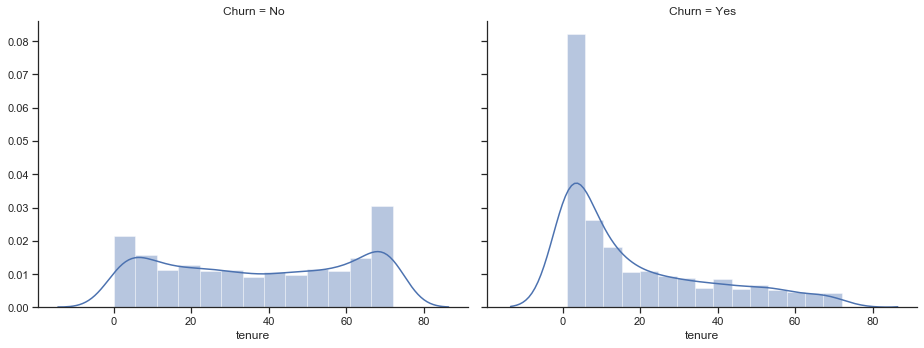

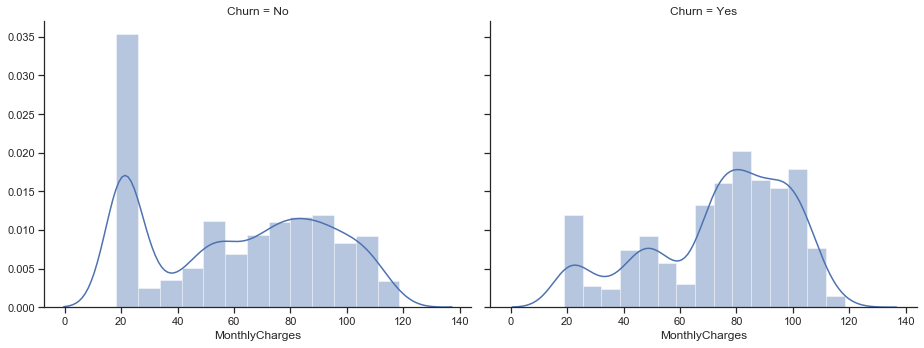

In [8]:
# Per features numeriche
for col in ['tenure', 'MonthlyCharges']:    
    g = sns.FacetGrid(train_dataframe, col="Churn", aspect=1.3, height=5)
    g.map(sns.distplot, col)
    plt.show(g)

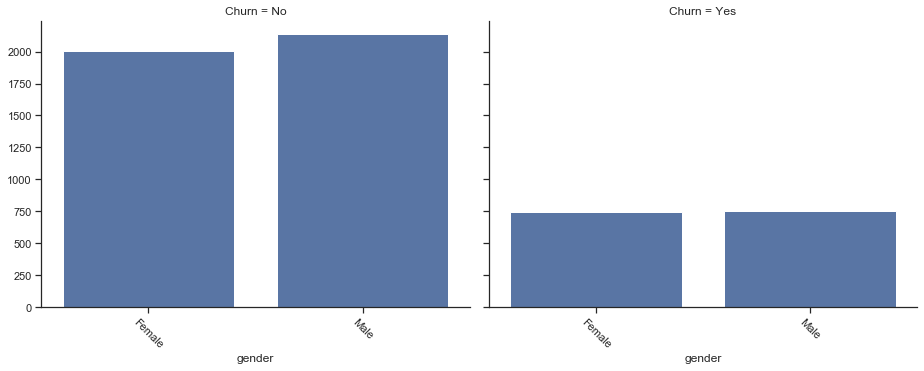

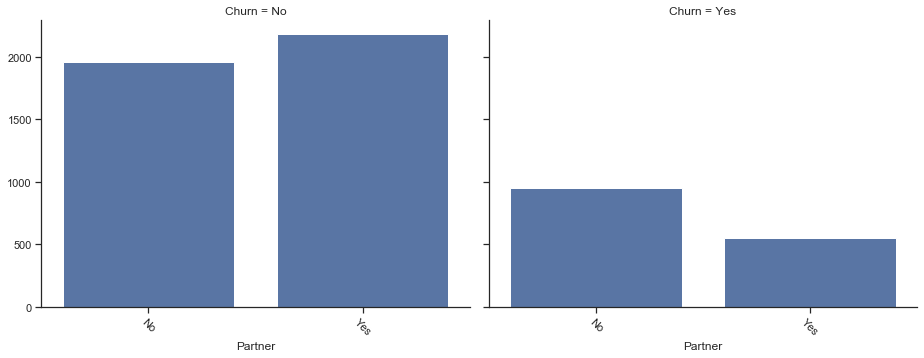

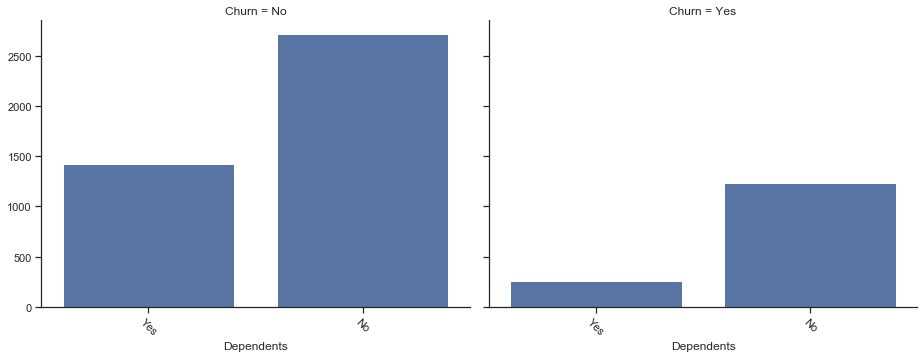

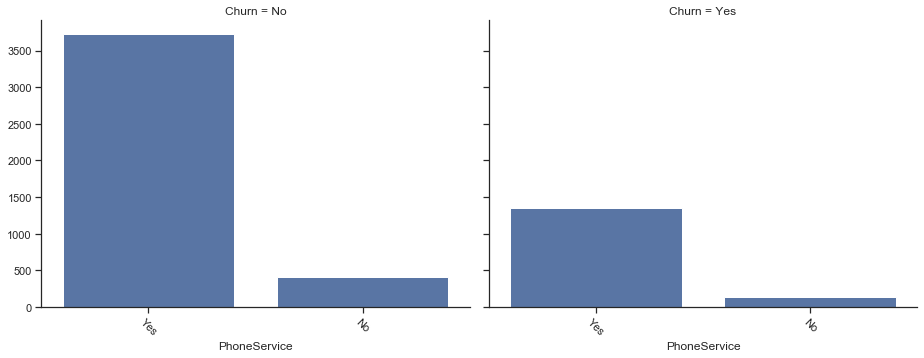

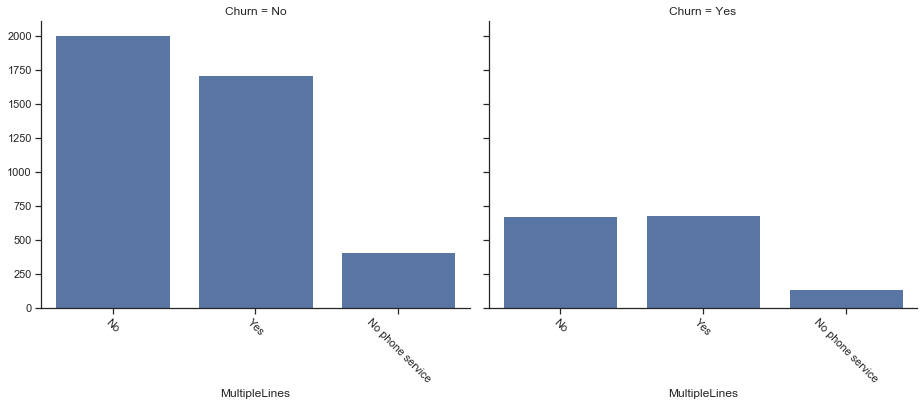

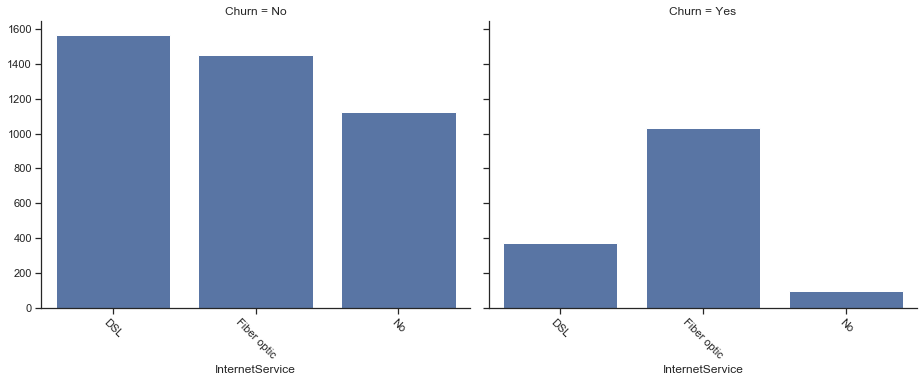

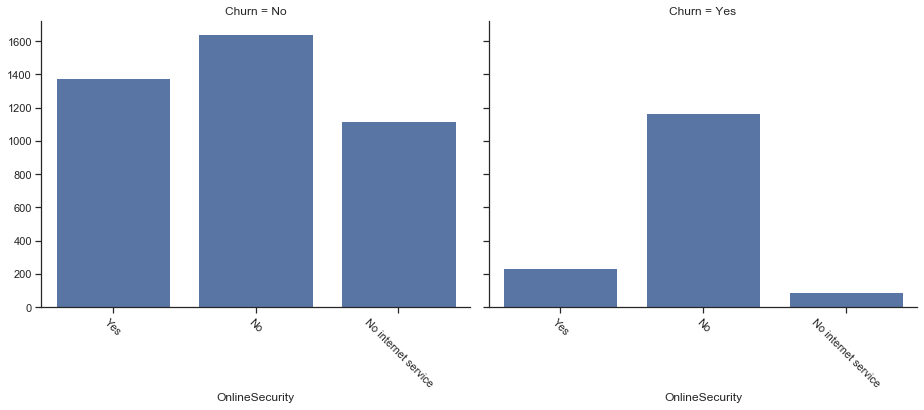

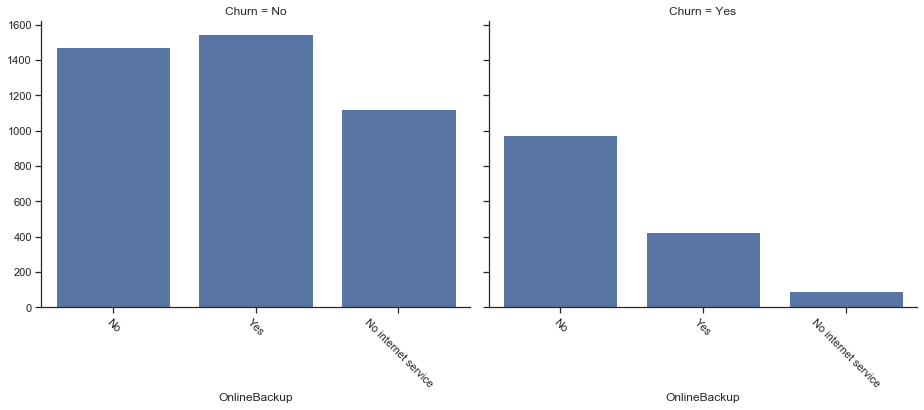

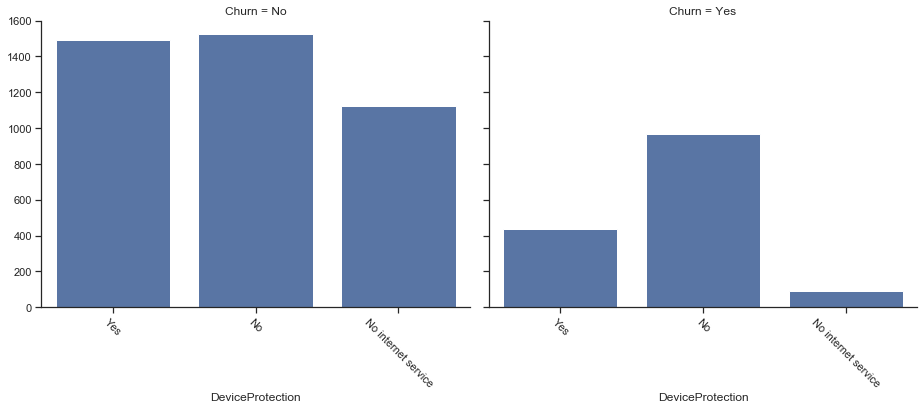

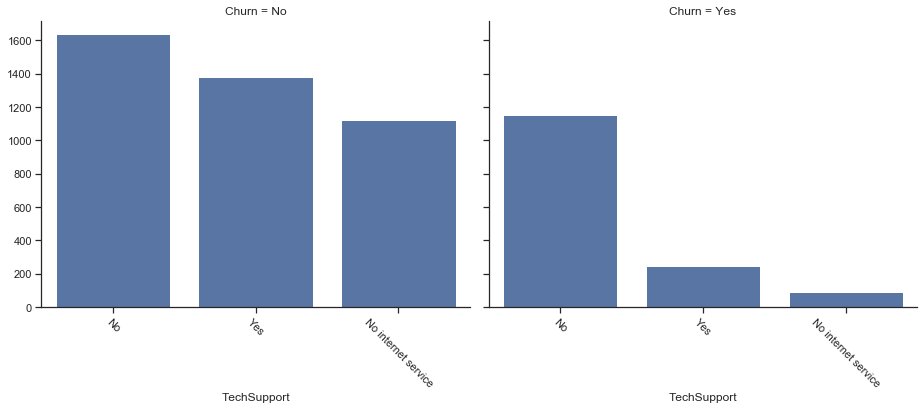

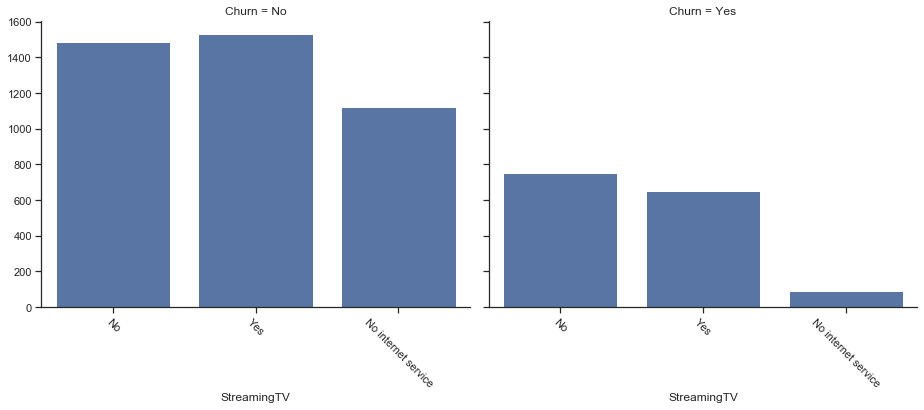

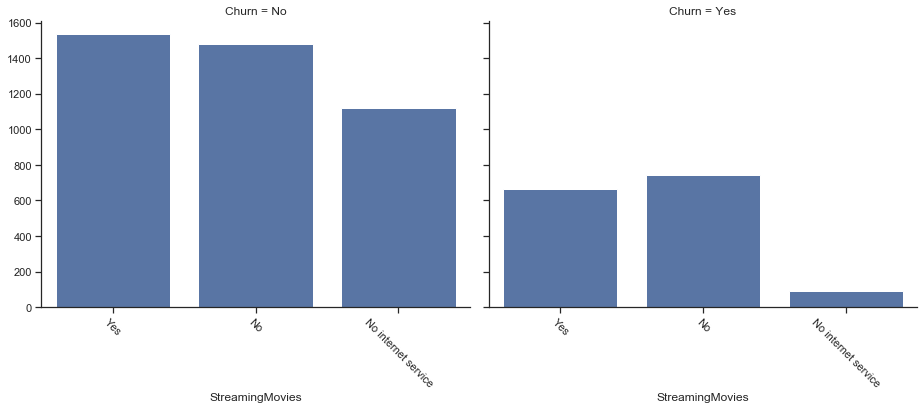

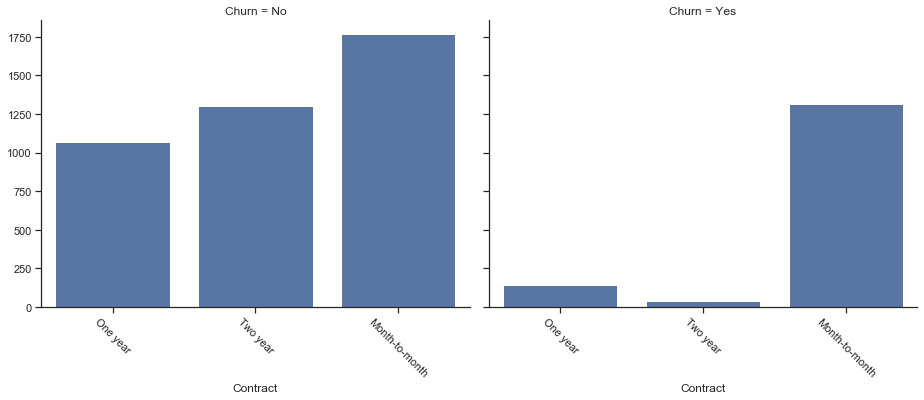

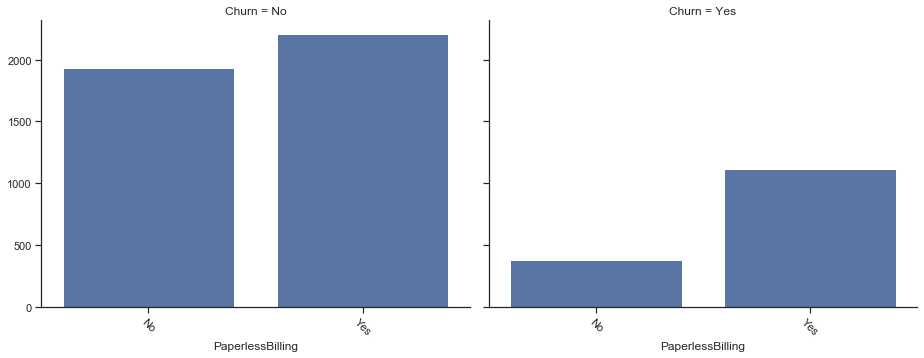

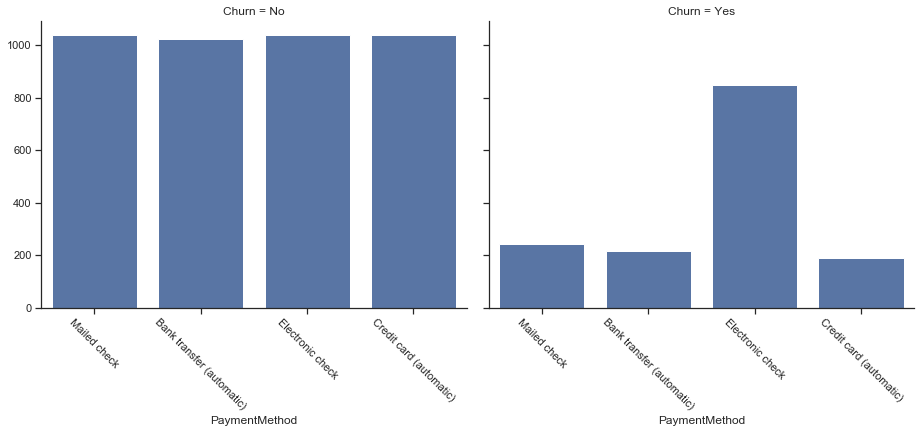

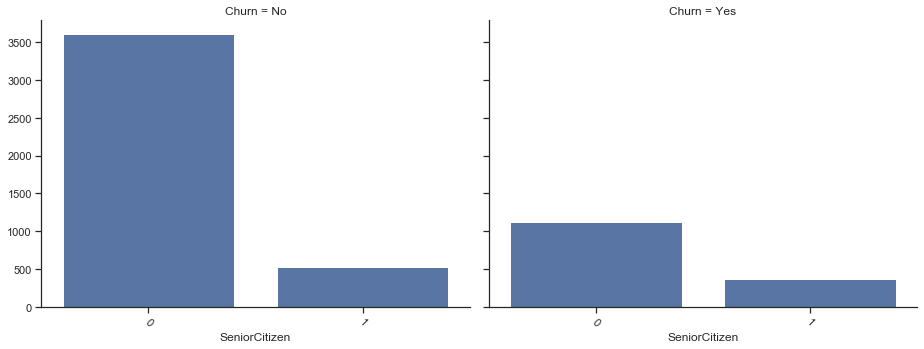

In [9]:
# Per features categoriche 
cat_features = [c for c in train_dataframe.columns 
                if train_dataframe[c].dtype == 'object' 
                and train_dataframe[c].nunique() <= 4]

cat_features.append('SeniorCitizen')

for col in cat_features[1:]:    
    g = sns.FacetGrid(train_dataframe, col="Churn", aspect=1.3, height=5)
    g.map(sns.countplot, col, order=train_dataframe[col].unique())
    g.set_xticklabels(rotation=-45)
    plt.show(g)


- **gender** sembra non essere affatto determinante;

- **Partner** sembra essere leggermente determinante, chi ha un partner tende a non abbandonare, chi non ce l'ha tende ad abbandonare più frequentemente (potrebbe essere dovuto al disaccordo col partner); - OK

- **Dependents**, mantiene le stesse proporzioni, oltre al fatto che i casi di utenze con dipendenti sono meno probabili di clienti singoli, non sembra determinante, possibilità di **data leakage** in quanto i dati potrebbero non essere presenti al momento in cui viene fatta la predizione;

- **PhoneService**, anche qui si osserva una certa proporzionalità quindi non viene scelta;

- **MultipleLines** ...

- Per le restanti features sono stati fatte considerazioni analoge, in conclusione le feature selezionate si trovano scritte a seguire.

In [10]:
# Selezione delle features

num_features = ['tenure', 'MonthlyCharges']

cat_features = ['Partner', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'Contract', 'PaymentMethod']

In [11]:
# Tutte le features categoriche (usato per approccio all-in)
# all_in_cat = [col for col in train_dataframe.columns 
#               if train_dataframe[col].dtype == 'object'
#               and col not in ['Churn', 'customerID', 'TotalCharges']]

In [12]:
# Split target / predittori

y = train_dataframe['Churn']
X = train_dataframe[num_features + cat_features]

# Mostra X
X

,tenure,MonthlyCharges,Partner,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod
0,21,64.85,No,DSL,Yes,No,Yes,No,One year,Mailed check
1,54,97.20,No,Fiber optic,No,Yes,No,No,Two year,Bank transfer (automatic)
2,1,23.45,Yes,DSL,No,No,No,No,Month-to-month,Electronic check
3,4,70.20,No,Fiber optic,No,No,No,No,Month-to-month,Electronic check
4,0,61.90,No,DSL,Yes,Yes,No,Yes,Two year,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...
5629,1,95.00,Yes,Fiber optic,Yes,No,No,No,Month-to-month,Electronic check
5630,23,91.10,Yes,DSL,Yes,Yes,Yes,Yes,Two year,Credit card (automatic)
5631,12,21.15,Yes,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,Electronic check
5632,12,99.45,No,Fiber optic,No,No,Yes,No,Month-to-month,Electronic check


In [13]:
# Split train / test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [14]:
# Preprocessore
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelBinarizer, Normalizer, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# prep = ColumnTransformer(transformers=[ ('scaler', MinMaxScaler(), num_features),  
#                                         ('all_in', OrdinalEncoder(), all_in_cat) ])
#                                       #('ohoenc', OneHotEncoder(), cat_features[1:6]),
#                                       #('ordenc', OrdinalEncoder(), ['Partner', 'Contract', 'PaymentMethod']) ], remainder='passthrough' )
 
#('fgen', PolynomialFeatures(interaction_only=True, include_bias=False), num_features)

preppor = ColumnTransformer(transformers=[ ('ordenc', OneHotEncoder(handle_unknown='ignore'), cat_features) ], 
                            remainder='passthrough')

# Preprocessore finale, viene usata la normalizzazione l1, ogni vettore riga (ogni sample viene ridotto a norma unitaria
# l'idea è di cercare nello spazio delle fasi uniformando al contempo i valori numerici delle tariffe e dei mesi)
preppor = Pipeline(steps=[ ('column', preppor),
                           ('norml1', Normalizer(norm='l1')) ])


# Test
pd.DataFrame(preppor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.010588,0.000000,0.000000,0.000000,0.010588,0.000000,0.010588,0.000000,0.000000,0.010588,...,0.000000,0.000000,0.010588,0.000000,0.000000,0.000000,0.000000,0.010588,0.709370,0.205929
1,0.000000,0.005218,0.000000,0.005218,0.000000,0.000000,0.000000,0.005218,0.000000,0.000000,...,0.005218,0.000000,0.000000,0.005218,0.000000,0.000000,0.005218,0.000000,0.365249,0.593008
2,0.000000,0.006098,0.006098,0.000000,0.000000,0.000000,0.000000,0.006098,0.000000,0.000000,...,0.006098,0.000000,0.000000,0.006098,0.000000,0.006098,0.000000,0.000000,0.414634,0.536585
3,0.000000,0.010241,0.010241,0.000000,0.000000,0.000000,0.000000,0.010241,0.010241,0.000000,...,0.000000,0.010241,0.000000,0.000000,0.010241,0.000000,0.000000,0.000000,0.501792,0.416283
4,0.006341,0.000000,0.006341,0.000000,0.000000,0.000000,0.000000,0.006341,0.000000,0.000000,...,0.006341,0.000000,0.000000,0.006341,0.006341,0.000000,0.000000,0.000000,0.399493,0.549778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,0.015711,0.000000,0.015711,0.000000,0.000000,0.015711,0.000000,0.000000,0.015711,0.000000,...,0.015711,0.015711,0.000000,0.000000,0.000000,0.000000,0.015711,0.000000,0.188531,0.685782
4503,0.000000,0.006966,0.000000,0.006966,0.000000,0.006966,0.000000,0.000000,0.006966,0.000000,...,0.000000,0.006966,0.000000,0.000000,0.006966,0.000000,0.000000,0.000000,0.299547,0.644723
4504,0.016181,0.000000,0.016181,0.000000,0.000000,0.016181,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.016181,0.000000,0.000000,0.000000,0.016181,0.242718,0.627832
4505,0.000000,0.013850,0.000000,0.000000,0.013850,0.000000,0.013850,0.000000,0.000000,0.013850,...,0.000000,0.000000,0.000000,0.013850,0.000000,0.000000,0.013850,0.000000,0.623269,0.265928


In [15]:
# Codifica delle label/target
lbenc = LabelBinarizer()

# Test
lbenc.fit_transform(y_train)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [16]:
# Model builder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Costruisce un modello di rete neurale fornendo la dimensione dell'input
# ed una lista dimensioni dei layer intermedi
def telco_model_builder(input_size, layer_sizes):
    
    inputs = keras.Input(shape=(input_size,))
    x = layers.Dense(layer_sizes[0], activation="relu")(inputs)
    
    # Aggiunge layer nascosti + dropout per overfitting
    for size in layer_sizes[1:]:
        x = layers.Dense(size, activation="relu")(x)
        x = layers.Dropout(0.3)(x)
        
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs, name="telco_model")
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy"])
    
    return model

# Test ed esempio (utile per testare diverse configurazioni)
telco_model_builder(10, [10, 10]).summary()

Model: "telco_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Preprocessing
X_train_matrix = preppor.fit_transform(X_train)
y_train_labels = lbenc.fit_transform(y_train)

# Crea e imposta il modello
telco_model = telco_model_builder(X_train_matrix.shape[1], [128, 64, 32])
telco_model.summary()


# Addestra il modello
history = telco_model.fit(X_train_matrix, 
                          y_train_labels, 
                          batch_size=32, 
                          epochs=100, 
                          validation_split=0.2)


# Test the model
preppor.fit(X) # Adatta a nuove informazioni (X = X_train + X_test)
test_scores = telco_model.evaluate(preppor.transform(X_test), lbenc.transform(y_test), verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Model: "telco_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 26)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3456      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 

3605/3605 [==============================] - 0s 46us/sample - loss: 0.4337 - accuracy: 0.7942 - val_loss: 0.3950 - val_accuracy: 0.8171
Epoch 48/100
3605/3605 [==============================] - 0s 46us/sample - loss: 0.4333 - accuracy: 0.7936 - val_loss: 0.4023 - val_accuracy: 0.8104
Epoch 49/100
3605/3605 [==============================] - 0s 50us/sample - loss: 0.4349 - accuracy: 0.7936 - val_loss: 0.4032 - val_accuracy: 0.7927
Epoch 50/100
3605/3605 [==============================] - 0s 42us/sample - loss: 0.4317 - accuracy: 0.7922 - val_loss: 0.3991 - val_accuracy: 0.8171
Epoch 51/100
3605/3605 [==============================] - 0s 50us/sample - loss: 0.4312 - accuracy: 0.7953 - val_loss: 0.3976 - val_accuracy: 0.8160
Epoch 52/100
3605/3605 [==============================] - 0s 45us/sample - loss: 0.4311 - accuracy: 0.7931 - val_loss: 0.3969 - val_accuracy: 0.8259
Epoch 53/100
3605/3605 [==============================] - 0s 43us/sample - loss: 0.4356 - accuracy: 0.7953 - val_loss: 

{'neg_label': 0, 'pos_label': 1, 'sparse_output': False}


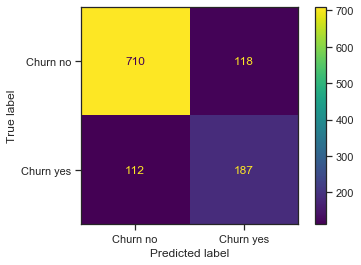

In [18]:
# Confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Utilizzo il modello per predire tutto il test set
pred = telco_model.predict(preppor.transform(X_test)).round()

# Calcolo la confusion matrix confrontando le predizioni con la ground truth
cmatrix = confusion_matrix(pred, lbenc.transform(y_test))

print(lbenc.get_params())

disp=ConfusionMatrixDisplay(confusion_matrix=cmatrix,
                            display_labels=['Churn no', 'Churn yes'])


# Mostra la confusion matrix con un grafico stile heatmap
disp = disp.plot(values_format='d')
plt.show()

In [19]:
lbenc.get_params()

{'neg_label': 0, 'pos_label': 1, 'sparse_output': False}

In [20]:
# Addestramento sul dataset completo

# Preprocessing
X_matrix = preppor.fit_transform(X)
y_labels = lbenc.fit_transform(y)

# Crea e imposta il modello
telco_model = telco_model_builder(X_matrix.shape[1], [128, 64, 32])
telco_model.summary()


# Addestra il modello
history = telco_model.fit(X_matrix, 
                          y_labels, 
                          batch_size=32, 
                          epochs=100, 
                          validation_split=0.2)

Model: "telco_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 26)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               3456      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 

4507/4507 [==============================] - 0s 41us/sample - loss: 0.4333 - accuracy: 0.7979 - val_loss: 0.4127 - val_accuracy: 0.8012
Epoch 48/100
4507/4507 [==============================] - 0s 41us/sample - loss: 0.4312 - accuracy: 0.7939 - val_loss: 0.4074 - val_accuracy: 0.8004
Epoch 49/100
4507/4507 [==============================] - 0s 41us/sample - loss: 0.4295 - accuracy: 0.7941 - val_loss: 0.4071 - val_accuracy: 0.7977
Epoch 50/100
4507/4507 [==============================] - 0s 40us/sample - loss: 0.4330 - accuracy: 0.7925 - val_loss: 0.4058 - val_accuracy: 0.8039
Epoch 51/100
4507/4507 [==============================] - 0s 41us/sample - loss: 0.4303 - accuracy: 0.7912 - val_loss: 0.4063 - val_accuracy: 0.8012
Epoch 52/100
4507/4507 [==============================] - 0s 40us/sample - loss: 0.4305 - accuracy: 0.7912 - val_loss: 0.4093 - val_accuracy: 0.7977
Epoch 53/100
4507/4507 [==============================] - 0s 40us/sample - loss: 0.4316 - accuracy: 0.7928 - val_loss: 

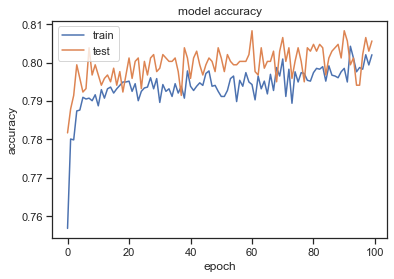

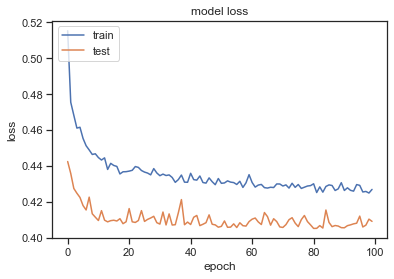

In [21]:
# Ok, questo l'ho copiato e incollato al volo perché 
#volevo avere un'idea di come procede il modello durante l'addestramento.
# Alla prossima lo rifaccio meglio con seaborn 

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Conclusioni

- La loss resta un po' alta, si tratta di una binary crossentropy.

- Ho deciso di svolgere questa prova in 24h per simulare il tempo reale della prova finale e sono arrivato quasi al limite del tempo, le attività più consumanti sono la fase di features selection e cleaning dei dati, oltre ad eventuali imprevisti del quotidiano. Si potrebbe anche fare delle grid search ed ulteriori ottimizzazioni se ci fosse pù tempo oppure se i dati fossero già raffinati.

- Ho trovato su kaggle un lavoro interessante in cui sono stati usati più classificatori in un sistema di voting, riuscendo ad ottenere l'80.1% di accuracy per questo stesso dataset. Per correttezza ho lasciato invariata la mia soluzione così come i risultati ottenuti.